In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import neighbors

# EDA

In [2]:
iris = datasets.load_iris()
print(iris.keys())

print(' ')
print(iris.feature_names)

print(' ')
print(iris.target_names)

print(' ')
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.head())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
 
['setosa' 'versicolor' 'virginica']
 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


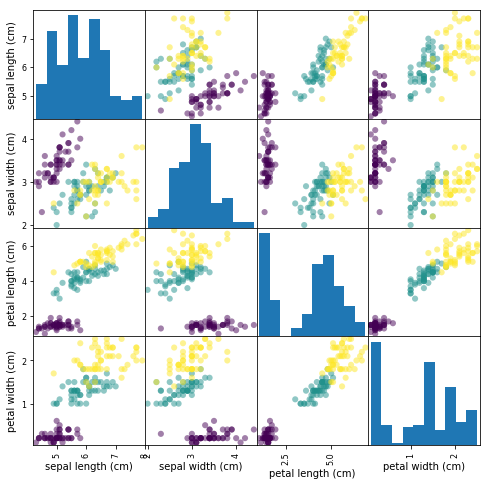

In [3]:
_ = pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8,8), marker='.', s=150)
plt.show()

# KNN

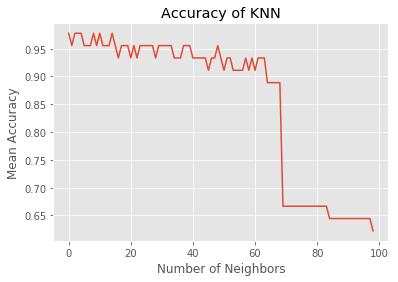

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Split data into features and targets
X = iris.data
y = iris.target

#Split features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#Fit and predict
scores = []

for n in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    scores.append(score) #mean accuracy

#Visualize accuracy as neighbors increase
plt.style.use('ggplot')
plt.plot(scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy of KNN')
plt.show()

In [5]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

iris_confmx = pd.DataFrame(confusion_matrix(y_test, y_predict), index=iris.target_names, columns=iris.target_names)
print(iris_confmx)

            setosa  versicolor  virginica
setosa          15           0          0
versicolor       2          13          0
virginica        0          15          0


In [6]:
#Classification Report
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_predict, target_names=iris.target_names)
print(clf_report)

             precision    recall  f1-score   support

     setosa       0.88      1.00      0.94        15
 versicolor       0.46      0.87      0.60        15
  virginica       0.00      0.00      0.00        15

avg / total       0.45      0.62      0.51        45



/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
#Tune Hyperparameter
from sklearn.model_selection import GridSearchCV

#Create a range of values to pick from as the parameter value
n_space = list(range(1,20))

#Create a dict that holds the parameter name (provide from documentation) and values
param_grid = {'n_neighbors': n_space}

#Instantiate the classifier, and the GridSearch object, then fit
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

print('Best parameter: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))
print('Best estimator: {}'.format(knn_cv.best_estimator_))

Best parameter: {'n_neighbors': 6}
Best score: 0.98
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


# Logistic Regression

Uses CrossEntropy / Logloss

In [8]:
from sklearn.linear_model import LogisticRegression

#Create features and targets
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

#Fit and predict
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

#Display results
print("Accuracy score: {}".format(logreg.score(X_test, y_test)))
print(" ")

logreg_confmx = pd.DataFrame(confusion_matrix(y_test, y_predict), index=cancer.target_names, columns=cancer.target_names)
print(logreg_confmx)
print(" ")

print("No. of Misclassified: {}".format(np.sum(np.abs(y_predict-y_test))))

Accuracy score: 0.9473684210526315
 
           malignant  benign
malignant         57       7
benign             2     105
 
No. of Misclassified: 9


In [9]:
logreg_clf_report = classification_report(y_test, y_predict, target_names=cancer.target_names)
print(logreg_clf_report)

             precision    recall  f1-score   support

  malignant       0.97      0.89      0.93        64
     benign       0.94      0.98      0.96       107

avg / total       0.95      0.95      0.95       171



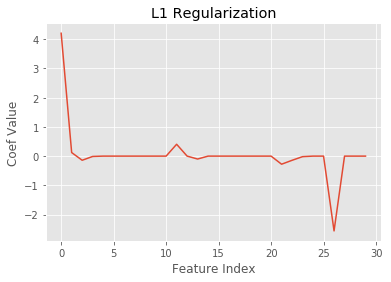

In [10]:
#Display coefficients of features
plt.plot(range(0,30), logreg.coef_.reshape(-1,1))
plt.xlabel('Feature Index')
plt.ylabel('Coef Value')
plt.title('L1 Regularization')
plt.show()

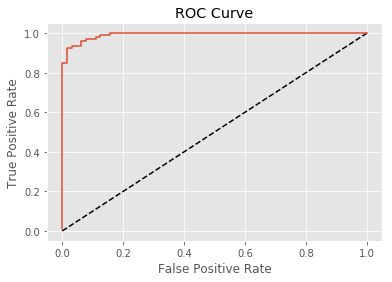

AUC: 0.9924065420560748
AUC scores computed using 5-fold cross-validation: [ 0.99031008  0.99224806  0.99765258  0.98289738  0.99765258]


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

y_pred_proba = logreg.predict_proba(X_test)[:,1]
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

In [12]:
#Tuning of Hyperparameter
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 100000000.0}
Best score is 0.9522613065326633


# Linear Regression

A linear regression will find the linear relationship between feature and target variable that results in the least amount of variance. Specifically, it uses OLS; Ordinary Least Squares. 

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
(506, 1)
(506, 1)


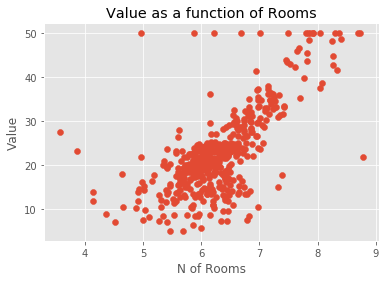

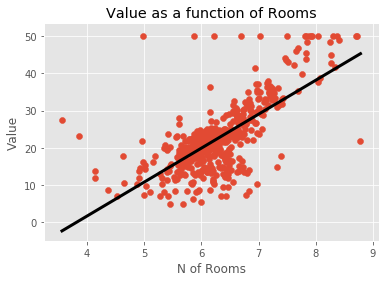

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
0.350741350933


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 

#Become familiar with the dataset
boston = datasets.load_boston()
boston.keys()
print(boston.data.shape)
print(boston.feature_names)

#Seperate features in X, and target in y
X = boston.data
y = boston.target

#Create a dataframe out of X
boston_df = pd.DataFrame(X, columns=boston.feature_names)
print(boston_df.head())

#Slice out the 'Rooms' column and reshape into an array
number_of_rooms = np.array(boston_df.iloc[:,5]).reshape(-1,1)
y = y.reshape(-1,1)

print(number_of_rooms.shape)
print(y.shape)

#Plot data
plt.scatter(number_of_rooms, y)
plt.title('Value as a function of Rooms')
plt.xlabel('N of Rooms')
plt.ylabel('Value')
plt.show()

### Fitting a Linear Model Based on One Features

#Initialize LR object
reg = LinearRegression()

#Fit on the data
reg.fit(number_of_rooms, y)

#Create a prediction space
prediction_space = np.linspace(min(number_of_rooms), max(number_of_rooms)).reshape(-1, 1)

#Predict on the prediction space
y_predict = reg.predict(prediction_space)

#Plot
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.scatter(number_of_rooms, y)
plt.title('Value as a function of Rooms')
plt.xlabel('N of Rooms')
plt.ylabel('Value')
plt.show()

### Fitting a Linear Model Based on All Features

X_train, X_test, y_train, y_test = train_test_split(boston.data, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_predict = reg.predict(y_test)
reg_all.score(X_test, y_test)

### Cross Validation Fold
reg = LinearRegression()
cv_score = cross_val_score(reg, X, y, cv=5)

print(cv_score)
print(np.mean(cv_score))

### Regularized Regression

Linear regression determine a coefficients for each feature variable. This can lead to overfitting if the coefficients are too large. Regularizing a model penalizes large coefficients.

Ridge and Lasso Regressions are regularized. We need to choose alpha (controls model complexity), which is analogous to n in KNN. 0 alpha equals OLS; which can lead to over fitting...High alpha can lead to underfitting.

Ridge can help with Collinearity

0.69955650271


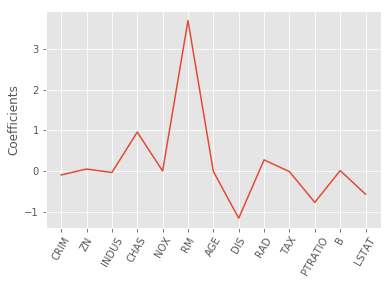

In [14]:
#### Ridge Regression

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
print(ridge.score(X_test, y_test))

#### Lasso Regression

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

features = boston_df.columns
_ = plt.plot(range(len(features)), lasso_coef)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [15]:
#Additional Example 
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.663431288655751
Tuned ElasticNet MSE: 25.56023409511068


/Users/pmcorrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Support Vector Machines

SVC, can work with mutiple classes, uses hinge loss, can be linear and non linear

In [16]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

NameError: name 'SVC' is not defined

In [ ]:
Complicated GridSearch

In [ ]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")